Dataset Shape: (300, 8)
Target column detected: Price
  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type  \
0    PROP0001  3712         4          3   36        Rural         House   
1    PROP0002  1591         4          1   35       Suburb         House   
2    PROP0003  1646         4          3   20        Rural         Villa   
3    PROP0004  4814         1          2   13  City Center         Villa   
4    PROP0005   800         4          2   38       Suburb     Apartment   

      Price  
0  22260000  
1  16057500  
2  12730000  
3  50840000  
4  10650000  
Missing values per column:
 Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64


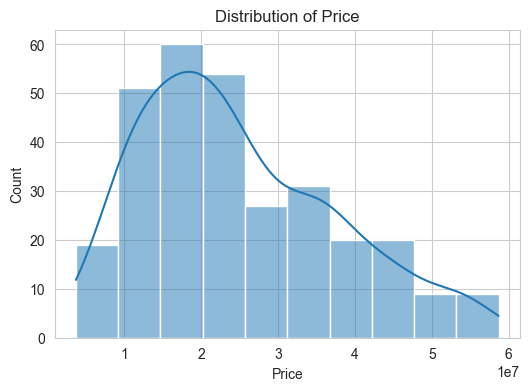

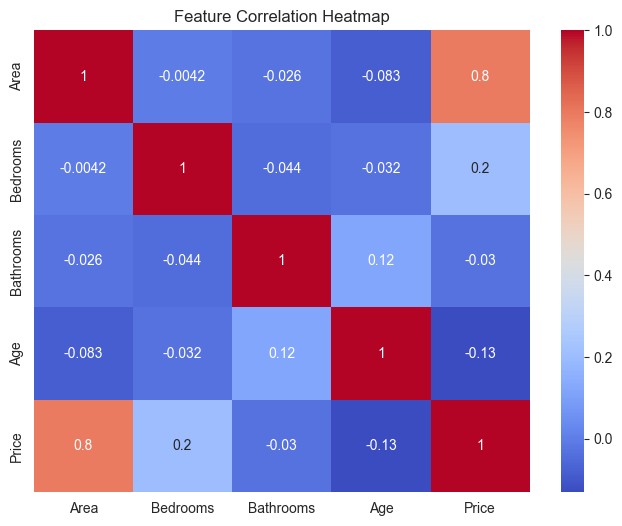

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

df = pd.read_csv("../datasets/house_prices.csv")
df.columns = df.columns.str.strip()

possible_targets = [col for col in df.columns if 'price' in col.lower()]
if len(possible_targets) == 0:
    raise Exception("No column containing 'price' found in the dataset.")
target_col = possible_targets[0]

df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
df[target_col].fillna(df[target_col].median(), inplace=True)

print("Dataset Shape:", df.shape)
print("Target column detected:", target_col)
print(df.head())

missing = df.isnull().sum()
print("Missing values per column:\n", missing)

plt.figure(figsize=(6,4))
sns.histplot(df[target_col], kde=True)
plt.title(f"Distribution of {target_col}")
plt.xlabel(target_col)
plt.ylabel("Count")
plt.show()

numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

df.fillna(df.median(numeric_only=True), inplace=True)
X = df.drop(target_col, axis=1)
y = df[target_col]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf
